# Exercise Eight:  Cultural Analysis

(For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

- Import your selected structured CSV data
- Use Pandas to note any preliminary trends in the CSV as a dataframe
- Use "group by" to break down at least two different subsets of data
- Plot a comparison between the grouped data (this will be easiest over time)
- Use one additional form of analysis or visualization from any we've tried so far)


DONT'T FORGET TO ANNOTATE!!!

## Stage One: (Import Structured CSV Data (bonus: from multiple files)

Import your selected structured CSV data

"In this section, we will demonstrate how to load, clean, and inspect tabular  data with Python. As an example dataset, we will work with the baby name  data as provided by the United States Social Security Administration.1 A dump  of this data can be found in the file data/names.csv, which contains records in  the naming of children in the United States from the nineteenth century until  modern times. For each year, this dataset provides all names for girls and boys  that occur at least five times. Before we can analyze the dataset, the first task is  to load it into Python. To appreciate the loading functionalities as implemented  by the library Pandas, we will first write our own data loading routines in pure  Python. The csv module is part of Python’s standard library and can employed  to conveniently read comma-separated values files (cf. chapter 2). The following  code block implements a short routine, resulting in a variable data which is a  list of baby name records. Each record is represented by a dictionary with the" (p. 127). following keys: “name,” “frequency” (an absolute number), “sex” (“boy” or  “girl”), and “year.”  import csv  with open('data/names.csv') as infile:  data = list(csv.DictReader(infile))  Recall from chapter 2 that csv.DictReader assumes that the supplied CSV  file contains a header row with column names. For each row, then, these column  names are used as keys in a dictionary with the contents of their corresponding cells as values. csv.DictReader returns a generator object, which requires  invoking list in the assignment above to give us a list of dictionaries. The  following prints the first dictionary:" (p. 128)). Princeton University Press.





In [6]:
import pandas as pd
import os
path = "movies/"
years = []
df_list = []

with os.scandir(path) as entries:
    for entry in entries:
        years.append(entry.name)
        temp_df = pd.read_csv(f'{path}{entry.name}')
        df_list.append(temp_df)
        
print(years[1])
print(df_list[1].head())
 

NotADirectoryError: [WinError 267] The directory name is invalid: 'movies.csv'

"Let us first import the Pandas library, using the conventional alias pd:  import pandas as pd  Pandas provides reading functions for a rich variety of data formats, such  as Excel, SQL, HTML, JSON, and even tabular data saved at the clipboard.  To load the contents of a CSV file, we use the pandas.read_csv() function. In  the following code block, we use this function to read and load the baby name  data:  df = pd.read_csv('data/names.csv')  The return value of read_csv() is a DataFrame object, which is the primary  data type for two-dimensional data in Pandas. To inspect the first n rows of  this data frame, we can use the method DataFrame.head():" (p. 130). 

## Stage Two: (Explore and note differences in headings / datatypes over the year)

 Use Pandas to note any preliminary trends in the CSV as a dataframe

In [7]:
[print(df.dtypes) for df in df_list]


[]

In [8]:
[print(df['Country'].head()) for df in df_list]

[]

## Stage Three: (Use Groupby to Explore (by Region))
(Note this sample shows only one example, two are required for the exercise itself)

Use "group by" to break down at least two different subsets of data

"Constructing each of the data frames now only takes a single line of code!  This implementation makes use of two crucial ingredients: DataFrame.groupby()  and DataFrame.apply(). First, let us explain the DataFrame.groupby() method  in greater detail. groupby() is used to split a data set into n groups of rows on  the basis of some criteria. Consider the following example dataset:" (p. 139). Princeton University Press. 

"Equipped with this new tool we simplify the earlier operation considerably,  noting that if we want to group by a data frame’s index (rather than one of its  columns) we do this by using the level=0 keyword argument:  boy_ranks = df.loc[df.sex == 'M'].groupby(level=0).apply(df2ranking)  girl_ranks = df.loc[df.sex == 'F'].groupby(level=0).apply(df2ranking)  Constructing each of the data frames now only takes a single line of code!  This implementation makes use of two crucial ingredients: DataFrame.groupby()  and DataFrame.apply(). First, let us explain the DataFrame.groupby() method  in greater detail. groupby() is used to split a data set into n groups of rows on  the basis of some criteria. Consider the following example dataset:" (p. 139). Princeton University Press.

In [9]:
print(close_region['Score'].mean())
print(close_region['Health (Life Expectancy)'].mean())

NameError: name 'close_region' is not defined

## Stage Four: Plot Grouped Data

"To compute this ratio, we need to retrieve the frequency of use for each  name with both sexes. By default, DataFrame.duplicated() marks all duplicates  as True except for the first occurrence. This is expected behavior if we want  to construct a list of duplicate items. For our purposes, however, we require  all duplicates, because we need the usage frequency of both sexes to compute  the usage ratio. Fortunately, the method DataFrame.duplicated() provides the  argument keep, which, when set to False, ensures that all duplicates are marked  True:" 

Karsdorp, Folgert; Kestemont, Mike; Riddell, Allen. Humanities Data Analysis: Case Studies with Python (p. 159). Princeton University Press. Kindle Edition. 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 7})

regions = close_region['Region'].unique()
names = [str(i) for i in regions]
names = [name.replace(' ', '\n') for name in names]
names = [name.replace("['",'') for name in names]
names = [name.replace("']",'') for name in names]

print(names[1])
x = np.arange(len(names))
width = 1/len(names)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, close_region['Score'].mean(), width, label='Happiness')
rects2 = ax.bar(x, close_region['Health (Life Expectancy)'].mean()*10, width, label='Life Expectancy')
rects3 = ax.bar(x + width, close_region['Freedom'].mean()*10, width, label='Freedom')


ax.set_ylabel('Rankings')
ax.set_title(years[1])
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()

NameError: name 'close_region' is not defined

## Stage Five:

Use one additional form of analysis or visualization from any we've tried so far

Genre
Action                          AxesSubplot(0.125,0.125;0.775x0.755)
Action, Adventure               AxesSubplot(0.125,0.125;0.775x0.755)
Action, Adventure, Biography    AxesSubplot(0.125,0.125;0.775x0.755)
Action, Adventure, Comedy       AxesSubplot(0.125,0.125;0.775x0.755)
Action, Adventure, Crime        AxesSubplot(0.125,0.125;0.775x0.755)
                                                ...                 
Thriller, Mystery               AxesSubplot(0.125,0.125;0.775x0.755)
Thriller, War                   AxesSubplot(0.125,0.125;0.775x0.755)
Thriller, Western               AxesSubplot(0.125,0.125;0.775x0.755)
War                             AxesSubplot(0.125,0.125;0.775x0.755)
Western                         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Title, Length: 486, dtype: object

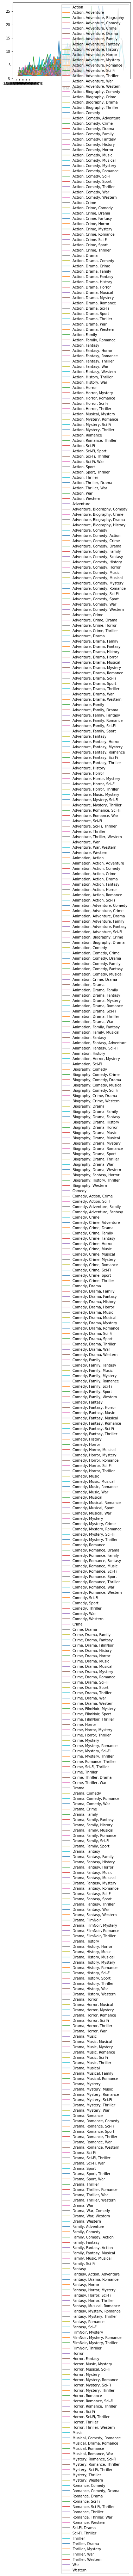

In [15]:
genre_comparison.groupby(['Genre']).plot(legend=True)

## Bonus Stage:

Use one additional visualization



Year
1915    AxesSubplot(0.125,0.125;0.775x0.755)
1916    AxesSubplot(0.125,0.125;0.775x0.755)
1919    AxesSubplot(0.125,0.125;0.775x0.755)
1920    AxesSubplot(0.125,0.125;0.775x0.755)
1921    AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Title, Length: 102, dtype: object

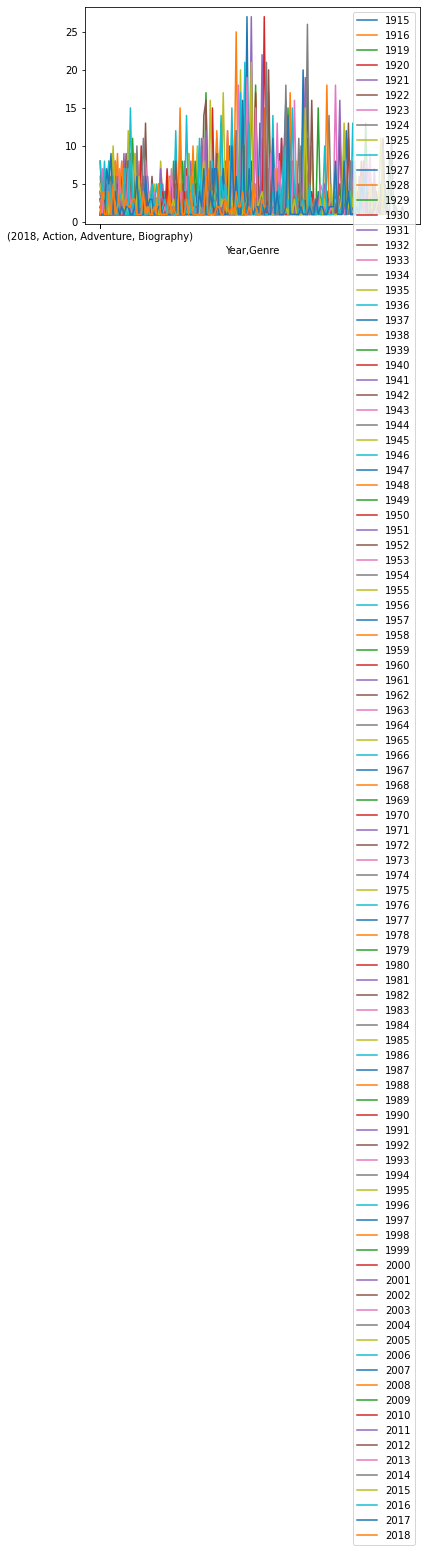

In [17]:
genre_comparison.groupby(['Year']).plot(legend=True)